In [ ]:
install = False
if install:
    !pip3 install --upgrade matplotlib
    !pip3 install --upgrade scikit-image
    !pip3 install --upgrade opencv-python

import numpy as np
import cv2 
import os 
import glob
import skimage
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt 
from skimage.color import label2rgb
from skimage import data

In [ ]:

image = cv2.imread("/Users/catherineli/Library/CloudStorage/OneDrive-UniversityofCapeTown/2.CSC2005Z/code-related/singleTree/test/ck2euxc9kxgvm07486g2d5pid_0_2492_267_2848_Palm.jpg", flags = cv2.IMREAD_GRAYSCALE)
imageN =cv2.imread("/Users/catherineli/Library/CloudStorage/OneDrive-UniversityofCapeTown/2.CSC2005Z/code-related/singleTree/test/norm/ck2euxc9kxgvm07486g2d5pid_0_2492_267_2848_Palm.jpg", flags = cv2.IMREAD_GRAYSCALE)

tree_im = cv2.imread("/Users/catherineli/Library/CloudStorage/OneDrive-UniversityofCapeTown/2.CSC2005Z/code-related/singleTree/test/ck2euxc9kxgvm07486g2d5pid_33_1251_339_1622_Tree.jpg", flags = cv2.IMREAD_GRAYSCALE)
tree_imN = cv2.imread("/Users/catherineli/Library/CloudStorage/OneDrive-UniversityofCapeTown/2.CSC2005Z/code-related/singleTree/test/norm/ck2euxc9kxgvm07486g2d5pid_33_1251_339_1622_Tree.jpg", flags = cv2.IMREAD_GRAYSCALE)


In [ ]:
def overlay_labels(image, lbp, labels):
    mask = np.logical_or.reduce([lbp == each for each in labels])
    return label2rgb(mask, image=image, bg_label=0, alpha=0.5)


def highlight_bars(bars, indexes):
    for i in indexes:
        bars[i].set_facecolor('r')


def hist(ax, lbp):
    n_bins = int(lbp.max() + 1)
    return ax.hist(
        lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins), facecolor='0.5'
    )

def lbp(image, n_points, radius, METHOD):
    lbp = local_binary_pattern(image, n_points, radius, METHOD)
    # plot histograms of LBP of textures
    fig, (ax_img, ax_hist) = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))
    plt.gray()

    titles = ('edge', 'flat', 'corner')
    w = width = radius - 1
    edge_labels = range(n_points // 2 - w, n_points // 2 + w + 1)
    flat_labels = list(range(0, w + 1)) + list(range(n_points - w, n_points + 2))
    i_14 = n_points // 4  # 1/4th of the histogram
    i_34 = 3 * (n_points // 4)  # 3/4th of the histogram
    corner_labels = list(range(i_14 - w, i_14 + w + 1)) + list(
        range(i_34 - w, i_34 + w + 1)
    )

    label_sets = (edge_labels, flat_labels, corner_labels)

    for ax, labels in zip(ax_img, label_sets):
        ax.imshow(overlay_labels(image, lbp, labels))

    for ax, labels, name in zip(ax_hist, label_sets, titles):
        counts, _, bars = hist(ax, lbp)
        highlight_bars(bars, labels)
        ax.set_ylim(top=np.max(counts[:-1]))
        ax.set_xlim(right=n_points + 2)
        ax.set_title(name)

    ax_hist[0].set_ylabel('Percentage')
    for ax in ax_img:
        ax.axis('off')



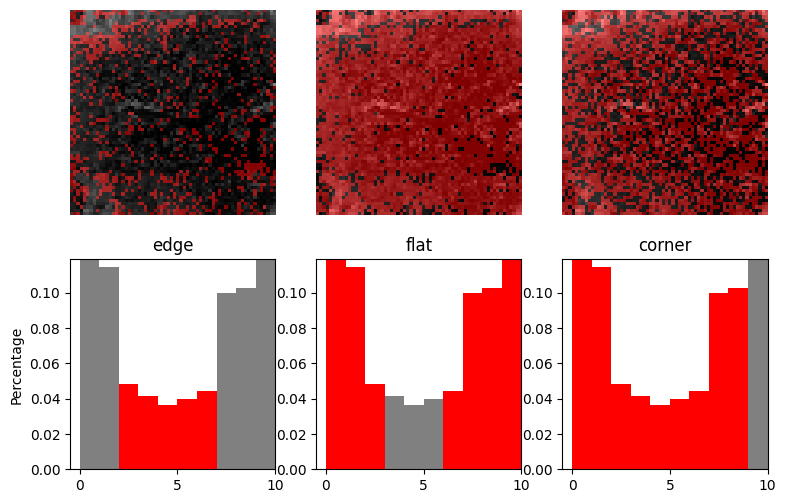

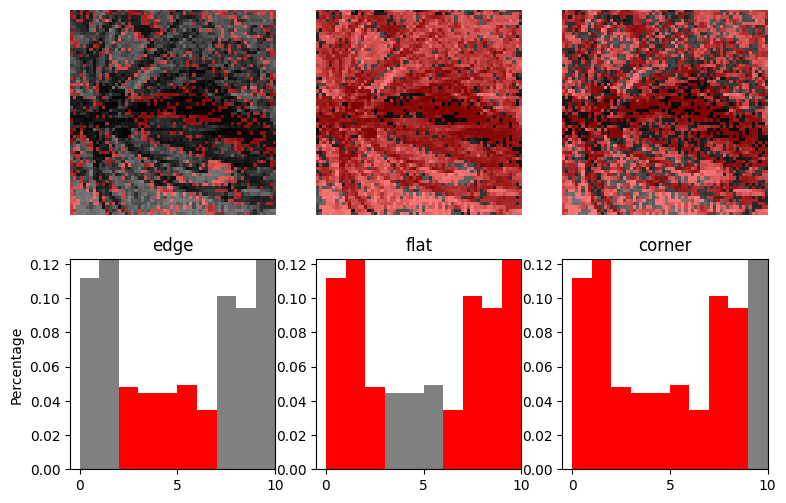

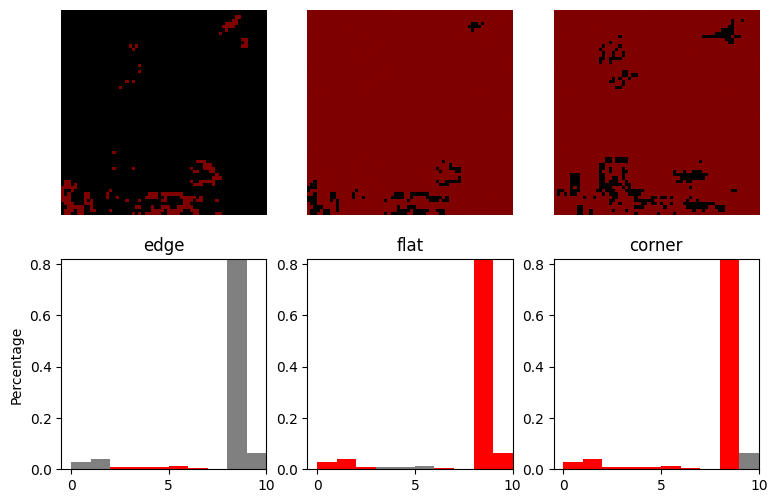

In [30]:
def lbp_feature(image):
    # P is number of circularly symmetric neighbor set points
    # r is radius 
    # TODO: what do the parameters mean, is it the same number of bins always 
    # delta x = legnth/ bin numbrs and round that down 
    # check for consistently sized histogram 
    # range between zero and 1 
    # set from 0 to 255 (wil have lots of zeros )
    # first number inclusive and excusive s
    lbp = local_binary_pattern(image, P=8, R=3, method='uniform').ravel()
    max = float(lbp.max())
    min = float(lbp.min())
    # print(lbp)
    # print("length of lbp: ",len(lbp))
    print("max ", max, "\nmin ", min)
    
    n_bins = int(max-min+1)
    print("10_bins: ", n_bins==10 )
    print("n_bins: ", n_bins, "\n")

    hist, bin_edges = np.histogram(lbp, bins=10, range=(0, 10), density=True)
    # print("Histogram values with density True: ",hist)
    # print('histogram edges: ', len(bin_edges))

    plot = False
    if plot:
        # Plot the histogram
        plt.hist(lbp, bins=11, density=True, facecolor='0.5')
        plt.title("Histogram")
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.show()
    # convert to histogram 
    return hist
# histo= lbp_feature(image)
# lbp_feature(imageN)# don't use normalised image, because doesn't expects 
lbp(tree_im, 8, 3, 'uniform')
lbp(image, 8, 3, 'uniform')
lbp(imageN, 8, 3, 'uniform')


In [23]:
res = local_binary_pattern(image, P=8, R=3, method='uniform')
res.shape
print(res)

[[9. 0. 1. ... 3. 3. 3.]
 [3. 0. 1. ... 1. 2. 2.]
 [4. 2. 9. ... 1. 2. 4.]
 ...
 [4. 2. 1. ... 9. 1. 1.]
 [3. 3. 1. ... 0. 0. 0.]
 [3. 3. 0. ... 0. 1. 0.]]


In [ ]:
# Store all the feature vectors into dictionary
# takes in the directory of the single trees 
# returns a dictionary of lbp features 
def extractlbp(srcDir):
    
    lbp_dict = {}
    im_paths = glob.glob(srcDir+"*.j*" )
    len_dir = len(srcDir)
    # print(len_dir)
    
    # for each tree extract lbp feature 
    for im_path in im_paths:
        
        image = cv2.imread(im_path, flags = cv2.IMREAD_GRAYSCALE)
            
        # find name of corresponding image (watch out if file name has a .j in other places)
        dot_index = im_path.find(".j")
        im_name = im_path[len_dir:dot_index]
        # print(im_name)
        np_lbp = lbp_feature(image)
        print(np_lbp)
        lbp_dict[im_name] = np_lbp

    return lbp_dict




In [25]:

generateFeatures = True
if generateFeatures:

    lbp_dict_test = extractlbp("/Users/catherineli/Library/CloudStorage/OneDrive-UniversityofCapeTown/2.CSC2005Z/code-related/singleTree/test/")
    print(len(lbp_dict_test))

    lbp_dict_train = extractlbp("/Users/catherineli/Library/CloudStorage/OneDrive-UniversityofCapeTown/2.CSC2005Z/code-related/singleTree/train/")
    print(len(lbp_dict_train))

    lbp_dict_test_n = extractlbp("/Users/catherineli/Library/CloudStorage/OneDrive-UniversityofCapeTown/2.CSC2005Z/code-related/singleTree/test/norm/")
    print(len(lbp_dict_test_n))

    lbp_dict_train_n = extractlbp("/Users/catherineli/Library/CloudStorage/OneDrive-UniversityofCapeTown/2.CSC2005Z/code-related/singleTree/train/norm/")
    print(len(lbp_dict_train_n))
    
    np.save('lbp_test.npy', lbp_dict_test)
    np.save('lbp_train.npy', lbp_dict_train)
    np.save('lbp_test_n.npy', lbp_dict_test_n)
    np.save('lbp_train_n.npy', lbp_dict_train_n)

    dict = lbp_dict_train | lbp_dict_test
    np.save('lbp.npy', dict)

    dict = lbp_dict_train_n | lbp_dict_test_n
    np.save('lbp_n.npy', dict)

max  9.0 
min  0.0
10_bins:  True
n_bins:  10 

[0.11865234 0.11499023 0.04516602 0.03735352 0.04272461 0.05615234
 0.03979492 0.10229492 0.09350586 0.34936523]
max  9.0 
min  0.0
10_bins:  True
n_bins:  10 

[0.11621094 0.12207031 0.04980469 0.04394531 0.03955078 0.05029297
 0.05053711 0.09057617 0.08935547 0.34765625]
max  9.0 
min  0.0
10_bins:  True
n_bins:  10 

[0.11108398 0.11572266 0.0546875  0.04394531 0.03833008 0.05322266
 0.04443359 0.09790039 0.0949707  0.34570312]
max  9.0 
min  0.0
10_bins:  True
n_bins:  10 

[0.11474609 0.10961914 0.05444336 0.06225586 0.05249023 0.05541992
 0.04223633 0.09228516 0.08496094 0.33154297]
max  9.0 
min  0.0
10_bins:  True
n_bins:  10 

[0.11938477 0.11889648 0.05517578 0.03686523 0.03686523 0.04663086
 0.03833008 0.10522461 0.09375    0.34887695]
max  9.0 
min  0.0
10_bins:  True
n_bins:  10 

[0.10839844 0.11474609 0.05981445 0.05273438 0.05615234 0.05224609
 0.04516602 0.09887695 0.08837891 0.32348633]
max  9.0 
min  0.0
10_bins:  True
